<a href="https://colab.research.google.com/github/Victor-KKKK/Pruning/blob/main/Pruning_Models_for_CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 모델경량화 Midterm 과제 - 김길성(2025451017)

GPU 체크 및 Import torch

In [ ]:
!nvidia-smi || echo "No NVIDIA GPU found."
import torch
print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())

Wed Nov 12 04:36:20 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   31C    P0             45W /  400W |       5MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

개인 Google drive 연결

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/pytorch-cifar-master
!pwd

/content/drive/MyDrive/pytorch-cifar-master
/content/drive/MyDrive/pytorch-cifar-master


run.sh 실행

In [ ]:
!chmod +x run.sh
!sed -i 's/\r$//' run.sh
!./run.sh


CIFAR10 Pruning (Seed/Prune) 실험을 시작합니다...
****** [SEED: 25] 실험 시작 ******
  [Seed: 25, Prune: 0.0] 실행 중... 로그: Random_RS25_ResNet18_Ep100_run_prune_0.0.log
  [Seed: 25, Prune: 0.0] 실행 완료.
  ------------------------------------------------
****** [SEED: 25] 실험 완료 ******

모든 (Seed/Prune) 실험이 완료되었습니다.


Drawing Accuracy Sparsity Curve

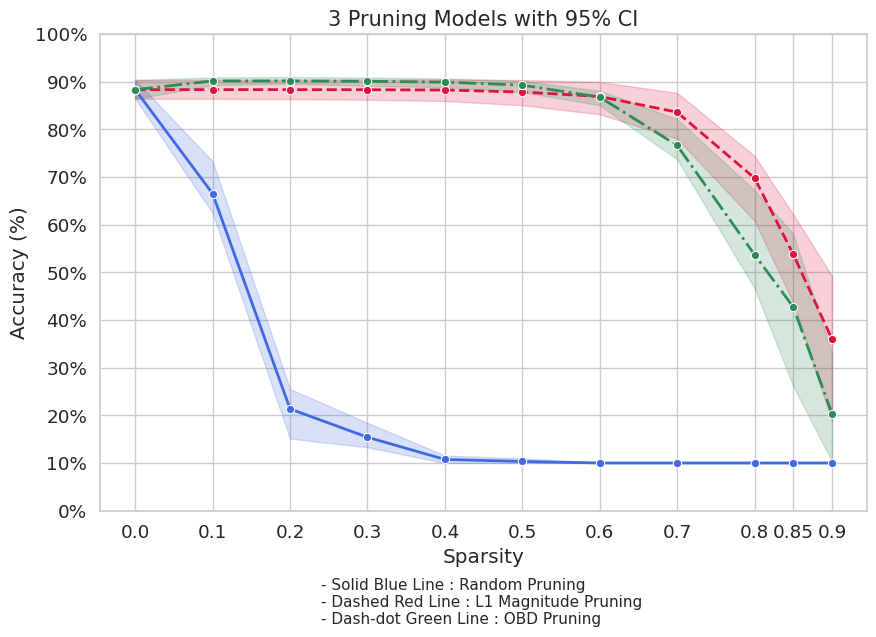

Saved as: figure_paper.pdf (vector) and figure_talk.png (600dpi)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# ====== (1) 데이터 준비 ======
x_values = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9]

A_run1 = [88.180, 62.420, 15.100, 13.300, 11.560, 10.960, 10.000, 10.000, 10.000, 10.000, 10.000]
A_run2 = [86.400, 63.800, 23.420, 14.480, 10.000, 10.000, 10.000, 10.000, 10.000, 10.000, 10.000]
A_run3 = [90.350, 73.270, 25.510, 18.430, 10.660, 10.000, 10.000, 10.000, 10.000, 10.000, 10.000]

B_run1 = [88.180, 88.200, 88.220, 88.250, 88.300, 88.080, 87.550, 85.110, 74.080, 62.160, 49.250]
B_run2 = [86.400, 86.380, 86.330, 86.200, 85.930, 85.040, 83.150, 78.010, 60.790, 43.610, 18.750]
B_run3 = [90.350, 90.360, 90.400, 90.440, 90.470, 90.330, 89.940, 87.640, 74.420, 55.620, 39.980]

C_run1 = [88.180, 90.280, 90.230, 90.220, 90.200, 89.810, 88.080, 82.130, 67.230, 58.070, 33.090]
C_run2 = [86.400, 89.260, 89.260, 89.120, 88.820, 87.810, 85.040, 74.020, 47.840, 26.110, 17.640]
C_run3 = [90.350, 90.880, 90.970, 90.850, 90.660, 90.160, 87.120, 73.700, 46.030, 44.000, 10.330]

data = []
def add_model_data(model_name, runs):
    for run_name, y_values in runs.items():
        for x, y in zip(x_values, y_values):
            data.append((model_name, run_name, x, y))

add_model_data("Model A", {"Run1": A_run1, "Run2": A_run2, "Run3": A_run3})
add_model_data("Model B", {"Run1": B_run1, "Run2": B_run2, "Run3": B_run3})
add_model_data("Model C", {"Run1": C_run1, "Run2": C_run2, "Run3": C_run3})
df = pd.DataFrame(data, columns=["Model", "Run", "X", "Y"])

# ====== (2) 스타일/폰트(논문 호환) ======
# PDF/PS에 TrueType 임베딩(일부 학회/출판사 요구)
plt.rcParams.update({
    "pdf.fonttype": 42,  # TrueType
    "ps.fonttype": 42,
    "figure.dpi": 100    # 화면 미리보기용
})

sns.set(style="whitegrid", font_scale=1.2)

# ====== (3) 그래프 그리기 ======
fig = plt.figure(figsize=(9, 6))  # 발표용 스크린 비율
ax = plt.gca()

line_styles = {
    "Model A": ("solid",   "royalblue"),
    "Model B": ("dashed",  "crimson"),
    "Model C": ("dashdot", "seagreen")
}

for model in ["Model A", "Model B", "Model C"]:
    style, color = line_styles[model]
    sub = df[df["Model"] == model]
    sns.lineplot(
        data=sub, x="X", y="Y",
        errorbar=("ci", 95),
        marker="o", linewidth=2,
        color=color, linestyle=style, ax=ax
    )

# 축/레이블/눈금
ax.set_title("3 Pruning Models with 95% CI", fontsize=15)
ax.set_xlabel("Sparsity")
ax.set_ylabel("Accuracy (%)")
ax.set_xticks(x_values)
ax.set_xticklabels([str(x) for x in x_values])
ax.set_ylim(0, 100)
ax.set_yticks(range(0, 101, 10))
ax.yaxis.set_major_formatter(lambda y, _: f"{y:.0f}%")

# 범례 제거(캡션 사용)
# ax.legend().remove()

# 캡션(중앙 정렬)
captions = [
    "- Solid Blue Line : Random Pruning",
    "- Dashed Red Line : L1 Magnitude Pruning",
    "- Dash-dot Green Line : OBD Pruning"
]
fig.text(0.37, -0.06, "\n".join(captions), ha="left", fontsize=11)

# 여백(경고 없이 안전)
plt.subplots_adjust(bottom=0.23)
plt.tight_layout()

# ====== (4) 저장: 논문용 PDF(벡터) & 발표용 PNG(고해상도) ======
# 논문용 PDF: 벡터 그래픽, 흰 배경, 여백 포함
fig.savefig("figure_paper.pdf",
            bbox_inches="tight", pad_inches=0.05, transparent=False, dpi=300)

# 발표용 PNG: 600 dpi, 흰 배경(투명 배경 원하면 transparent=True)
fig.savefig("figure_talk.png",
            bbox_inches="tight", pad_inches=0.05, transparent=False, dpi=600)

plt.show()

print("Saved as: figure_paper.pdf (vector) and figure_talk.png (600dpi)")


결과정리를 위한 Python 프로그램

In [ ]:
import os

# --- 1. 설정 ---
# 스캔할 폴더 경로를 지정하세요.
# (예: r'C:\Users\YourName\Documents\MyLogs')
FOLDER_PATH = './mydata'

# 추출할 라인 번호를 지정하세요. (예: 5번째 라인)
TARGET_LINE_NUMBER = 49308

# 결과를 저장할 파일 이름을 지정하세요.
OUTPUT_FILE_NAME = 'OBD_RS35.txt'
# ---

def extract_specific_lines():
    """
    지정된 폴더의 모든 파일에서 특정 라인을 추출하여
    하나의 요약 파일로 저장합니다.
    """

    # 사용자가 입력한 라인 번호는 1부터 시작하지만,
    # 파이썬 리스트 인덱스는 0부터 시작하므로 1을 빼줍니다.
    target_index = TARGET_LINE_NUMBER - 1

    # 결과 파일이 저장될 전체 경로
    output_file_path = os.path.join(FOLDER_PATH, OUTPUT_FILE_NAME)

    # 추출된 라인들을 저장할 리스트
    all_extracted_lines = []

    print(f"'{FOLDER_PATH}' 폴더 스캔 시작...")
    print(f"각 파일의 {TARGET_LINE_NUMBER}번째 라인을 추출합니다.")

    # 폴더 내의 모든 파일 및 디렉토리 이름을 가져옵니다.
    try:
        filenames = os.listdir(FOLDER_PATH)
    except FileNotFoundError:
        print(f"[오류] 폴더를 찾을 수 없습니다: {FOLDER_PATH}")
        return
    except NotADirectoryError:
        print(f"[오류] 지정된 경로는 폴더가 아닙니다: {FOLDER_PATH}")
        return

    for filename in filenames:
        # 파일의 전체 경로
        file_path = os.path.join(FOLDER_PATH, filename)

        # 1. 폴더이거나, 2. 이 스크립트가 생성할 출력 파일 자체이면 건너뜁니다.
        if os.path.isdir(file_path) or filename == OUTPUT_FILE_NAME:
            continue

        try:
            # 파일을 텍스트 모드(encoding='utf-8')로 엽니다.
            # 'utf-8'로 열 수 없으면 바이너리 파일로 간주합니다.
            with open(file_path, 'r', encoding='utf-8') as f:
                lines = f.readlines()

                # 파일의 총 라인 수가 타겟 라인 번호보다 크거나 같은지 확인
                if len(lines) > target_index:
                    # 타겟 라인의 내용 (양쪽 공백 및 줄바꿈 문자 제거)
                    extracted_line = lines[target_index].strip()
                    all_extracted_lines.append(f"--- {filename} ---\n{extracted_line}\n")
                else:
                    # 파일이 타겟 라인보다 짧은 경우
                    all_extracted_lines.append(f"--- {filename} ---\n[파일이 너무 짧아 {TARGET_LINE_NUMBER}번째 라인이 없습니다.]\n")

        except UnicodeDecodeError:
            # 'utf-8'로 디코딩 실패 시 (바이너리 파일로 추정)
            print(f"[알림] 텍스트 파일이 아니므로 건너뜁니다: {filename}")
        except PermissionError:
            print(f"[오류] 파일 접근 권한이 없습니다: {filename}")
        except Exception as e:
            print(f"[오류] {filename} 처리 중 에러 발생: {e}")

    # --- 3. 결과 파일 저장 ---
    try:
        with open(output_file_path, 'w', encoding='utf-8') as f:
            f.write(f"'{FOLDER_PATH}' 폴더 내 파일들의 {TARGET_LINE_NUMBER}번째 라인 추출 결과\n")
            f.write("=" * 60 + "\n\n")

            for line_info in all_extracted_lines:
                f.write(line_info + "\n")

        print(f"\n[성공] 모든 작업 완료!")
        print(f"결과가 '{output_file_path}' 파일에 저장되었습니다.")

    except Exception as e:
        print(f"\n[오류] 결과 파일 저장 중 에러 발생: {e}")


# 스크립트 실행
if __name__ == "__main__":
    extract_specific_lines()

'./mydata' 폴더 스캔 시작...
각 파일의 49308번째 라인을 추출합니다.

[성공] 모든 작업 완료!
결과가 './mydata/OBD_RS35.txt' 파일에 저장되었습니다.
